In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 1500px !important; }</style>"))
%config InlineBackend.figure_format = 'svg'

In [4]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
import pandas as pd
import numpy as np
from model import normalise_cl, rescale_to_range
import datetime
import matplotlib.pyplot as plt
import itertools

In [5]:
%load_ext tensorboard

In [12]:
num_params = 3
learning_rate = 0.001

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(num_params,)),
    keras.layers.Dense(8, activation=tf.nn.relu),
    keras.layers.Dense(8, activation=tf.nn.relu),
#     keras.layers.Dropout(0.1),
    keras.layers.Dense(8, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

In [14]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [15]:
df = pd.read_csv('hdm_gor.csv')
# df2 = pd.read_csv('contur2.csv')
# df.append(df2)

In [16]:
df.describe()

Unnamed: 0   FermionEta        NDark     PionMass      VPi  \
count  1600.00000  1600.000000  1600.000000  1600.000000   1600.0   
mean    799.50000     0.550000     2.500000   550.000000  10000.0   
std     462.02453     0.273225     1.118384   273.225037      0.0   
min       0.00000     0.100000     1.000000   100.000000  10000.0   
25%     399.75000     0.325000     1.750000   325.000000  10000.0   
50%     799.50000     0.550000     2.500000   550.000000  10000.0   
75%    1199.25000     0.775000     3.250000   775.000000  10000.0   
max    1599.00000     1.000000     4.000000  1000.000000  10000.0   

                Xi           CL  
count  1600.000000  1600.000000  
mean      0.193810     0.405255  
std       0.356279     0.415632  
min       0.015625     0.001407  
25%       0.026067     0.004339  
50%       0.051941     0.247214  
75%       0.149900     0.897816  
max       1.562500     1.000000

In [17]:
x = df[['FermionEta', 'NDark', 'PionMass']].apply(rescale_to_range, axis=0)
y = normalise_cl(df['CL'], threshold=0.66)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.01,
    random_state=0)

In [19]:
csv_logger = tf.keras.callbacks.CSVLogger('training.log')
tensor_board = tf.keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=1)
callbacks_list = [tensor_board]

In [25]:
model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.90,
    callbacks=callbacks_list)
test_loss, test_acc = model.evaluate(x_test, y_test)

Epoch 1/100
10/10 [==============================] - 0s 21ms/step - loss: 0.0840 - accuracy: 0.9557 - val_loss: 0.0969 - val_accuracy: 0.9593
Epoch 2/100
10/10 [==============================] - 0s 12ms/step - loss: 0.0753 - accuracy: 0.9494 - val_loss: 0.1022 - val_accuracy: 0.9579
Epoch 3/100
10/10 [==============================] - 0s 11ms/step - loss: 0.0731 - accuracy: 0.9620 - val_loss: 0.1004 - val_accuracy: 0.9586
Epoch 4/100
10/10 [==============================] - 0s 12ms/step - loss: 0.0735 - accuracy: 0.9494 - val_loss: 0.0968 - val_accuracy: 0.9586
Epoch 5/100
10/10 [==============================] - 0s 12ms/step - loss: 0.0739 - accuracy: 0.9557 - val_loss: 0.1099 - val_accuracy: 0.9537
Epoch 6/100
10/10 [==============================] - 0s 24ms/step - loss: 0.0736 - accuracy: 0.9620 - val_loss: 0.0987 - val_accuracy: 0.9593
Epoch 7/100
10/10 [==============================] - 0s 12ms/step - loss: 0.0703 - accuracy: 0.9557 - val_loss: 0.1013 - val_accuracy: 0.9593
Epoch 

10/10 [==============================] - 0s 10ms/step - loss: 0.0541 - accuracy: 0.9873 - val_loss: 0.1148 - val_accuracy: 0.9565
Epoch 59/100
10/10 [==============================] - 0s 11ms/step - loss: 0.0499 - accuracy: 0.9873 - val_loss: 0.1090 - val_accuracy: 0.9600
Epoch 60/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0500 - accuracy: 0.9873 - val_loss: 0.1092 - val_accuracy: 0.9593
Epoch 61/100
10/10 [==============================] - 0s 11ms/step - loss: 0.0496 - accuracy: 0.9873 - val_loss: 0.1142 - val_accuracy: 0.9558
Epoch 62/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0500 - accuracy: 0.9873 - val_loss: 0.1091 - val_accuracy: 0.9593
Epoch 63/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0529 - accuracy: 0.9873 - val_loss: 0.1142 - val_accuracy: 0.9558
Epoch 64/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0505 - accuracy: 0.9873 - val_loss: 0.1100 - val_accuracy: 0.9565
Epoch 65/100

In [21]:
print(test_loss, test_acc)

0.10738831758499146 0.9375


In [20]:
%tensorboard --logdir logs

In [42]:
df[vars_[0]].unique()

array([0.1       , 0.14736842, 0.19473684, 0.24210526, 0.28947368,
       0.33684211, 0.38421053, 0.43157895, 0.47894737, 0.52631579,
       0.57368421, 0.62105263, 0.66842105, 0.71578947, 0.76315789,
       0.81052632, 0.85789474, 0.90526316, 0.95263158, 1.        ])

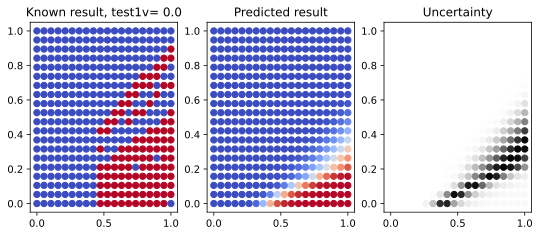

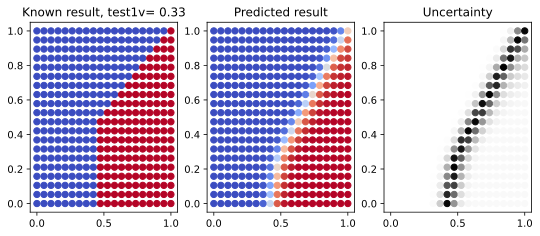

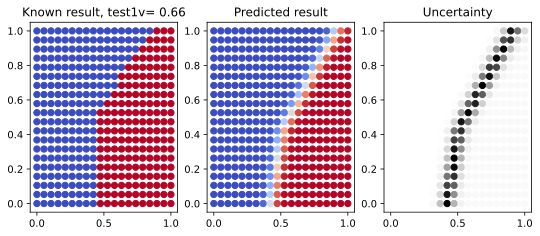

In [26]:
vars_ = ['FermionEta', 'NDark', 'PionMass']

xaxis=vars_[0]
yaxis=vars_[2]
scan1=vars_[1]
# scan2=vars_[1]

df_rescaled = df[[*vars_, 'CL']].apply(rescale_to_range, axis=0)

for scan1v in list((rescale_to_range(df[scan1].unique()))):

    actual_data = df_rescaled[(df_rescaled[scan1] == scan1v)]

    prediction = np.array(model.predict(actual_data[vars_]))[:,0]
    diff = 1-(prediction - 0.5)**2

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9,3.5))

    ax1.scatter(actual_data[xaxis],actual_data[yaxis], s=40, c=normalise_cl(actual_data['CL']),cmap=plt.cm.coolwarm)
    ax1.set_title('Known result, test1v= %s' % (int(scan1v*100)/100))
    ax2.scatter(actual_data[xaxis],actual_data[yaxis], s=40, c=prediction,cmap=plt.cm.coolwarm)
    ax2.set_title('Predicted result')
    ax3.scatter(actual_data[xaxis], actual_data[yaxis], s=40, c=diff, cmap=plt.cm.binary)
    ax3.set_title('Uncertainty')
    test_mXm = np.linspace(0,1,100)
    test_mY1 = np.linspace(0,1,100)
    plt.show()

In [25]:
list(itertools.product(rescale_to_range(df.gYXm.unique()), rescale_to_range(df.gYq.unique())))

[(0.0, 0.0),
 (0.0, 0.3333333333333333),
 (0.0, 0.6666666666666666),
 (0.0, 1.0),
 (0.25, 0.0),
 (0.25, 0.3333333333333333),
 (0.25, 0.6666666666666666),
 (0.25, 1.0),
 (0.5, 0.0),
 (0.5, 0.3333333333333333),
 (0.5, 0.6666666666666666),
 (0.5, 1.0),
 (0.75, 0.0),
 (0.75, 0.3333333333333333),
 (0.75, 0.6666666666666666),
 (0.75, 1.0),
 (1.0, 0.0),
 (1.0, 0.3333333333333333),
 (1.0, 0.6666666666666666),
 (1.0, 1.0)]

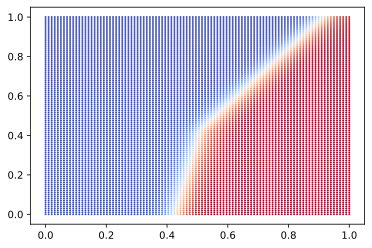

In [32]:
# test_mXm = np.linspace(0,1,100)
# test_mY1 = np.linspace(0,1,100)

# for test_gYXm, test_gYq in zip(rescale_to_range(df.gYXm.unique()), rescale_to_range(df.gYq.unique())):
#     input_array = np.zeros((10000, 4))

#     X, Y = np.mgrid[0:1:100j, 0:1:100j]
#     input_array[:,0] = test_gYXm
#     input_array[:,1] = test_gYq
#     input_array[:,2:] = np.vstack([X.ravel(), Y.ravel()]).transpose()

#     CLs = model.predict(input_array)

#     plt.scatter(X,Y, s=1, c=CLs,cmap=plt.cm.coolwarm)
#     plt.show()
    

input_array = np.zeros((10000, 3))
X, Y = np.mgrid[0:1:100j, 0:1:100j]
points = np.vstack([X.ravel(), Y.ravel()]).transpose()



input_array[:,0] = points[:,0]
input_array[:,1] = 0.66
input_array[:,2] = points[:,1]

CLs = model.predict(input_array)

plt.scatter(X,Y, s=1, c=CLs,cmap=plt.cm.coolwarm)
plt.show()